Mean Squared Error: 1.4161653979210159e-30
R-squared: 1.0


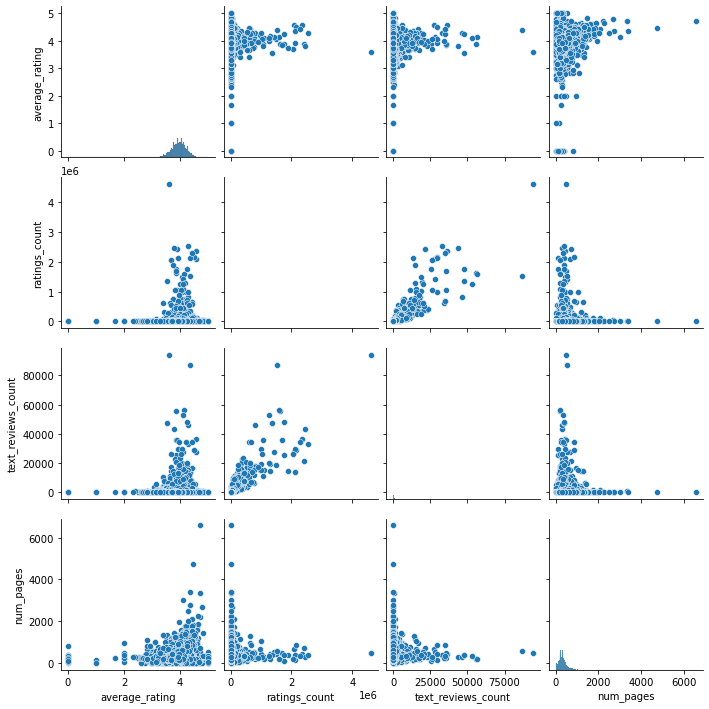

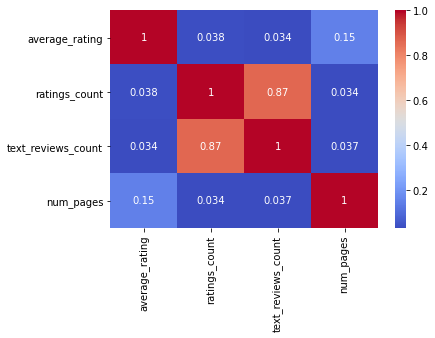

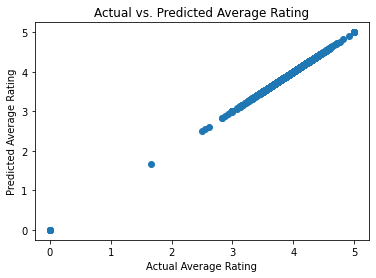

In [1]:
#I combined all my code here for exploring my processes of model discovering

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv(r'C:\Users\rosee\Downloads\clean_books_automated.csv')


# Remove leading spaces from column name
data.rename(columns=lambda x: x.strip(), inplace=True)

# Selecting features and target variable
X = data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']]
y = data['average_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between numerical variables
sns.pairplot(data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']])
plt.show()

# Correlation heatmap
correlation_matrix = data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Actual vs. Predicted Average Rating")
plt.show()



                    average_rating  ratings_count  text_reviews_count  \
average_rating            1.000000       0.038205            0.033734   
ratings_count             0.038205       1.000000            0.865979   
text_reviews_count        0.033734       0.865979            1.000000   
num_pages                 0.150809       0.034353            0.036998   

                    num_pages  
average_rating       0.150809  
ratings_count        0.034353  
text_reviews_count   0.036998  
num_pages            1.000000  


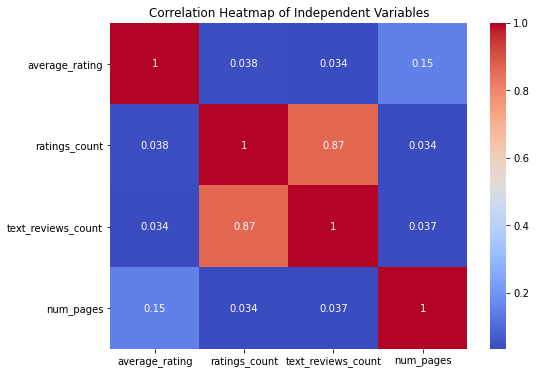

In [3]:
#Double Check: Possibility of Multicollinearity

import pandas as pd
import seaborn as sns

data = pd.read_csv(r'C:\Users\rosee\Downloads\clean_books_automated.csv')

# Remove leading spaces from column name
data.rename(columns=lambda x: x.strip(), inplace=True)

# Selecting features
X = data[['average_rating', 'ratings_count', 'text_reviews_count', 'num_pages']]

# Calculate the correlation matrix
correlation_matrix = X.corr()
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Independent Variables")
plt.show()
